import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('ETH2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 6:4
train_size = int(len(close_prices) * 0.6)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
forecast_test = model.predict(start=test.index[0], end=test.index[-1])

In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, forecast_test))
mape_test = mean_absolute_percentage_error(test, forecast_test)
mse_test = mean_squared_error(test, forecast_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 803.5223322321806
MAPE: 46.33394407101701
MSE: 645648.1383958427


### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
forecast_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(forecast_30_days)

1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
1820    2498.647483
1821    2561.160751
1822    2496.716931
1823    2501.279714
1824    2509.466334
1825    2485.422356
1826    2528.947604
1827    2508.581613
1828    2528.259604
1829    2508.758479
1830    2501.957457
1831    2531.854850
1832    2532.869942
1833    2536.418337
1834    2520.846751
1835    2477.461612
1836    2469.088212
1837    2418.027290
1838    2464.871790
1839    2420.960674
1840    2400.960364
1841    2403.935533
1842    2409.754996
1843    2400.339048
1844    2425.765923
1845    2426.969925
dtype: float64


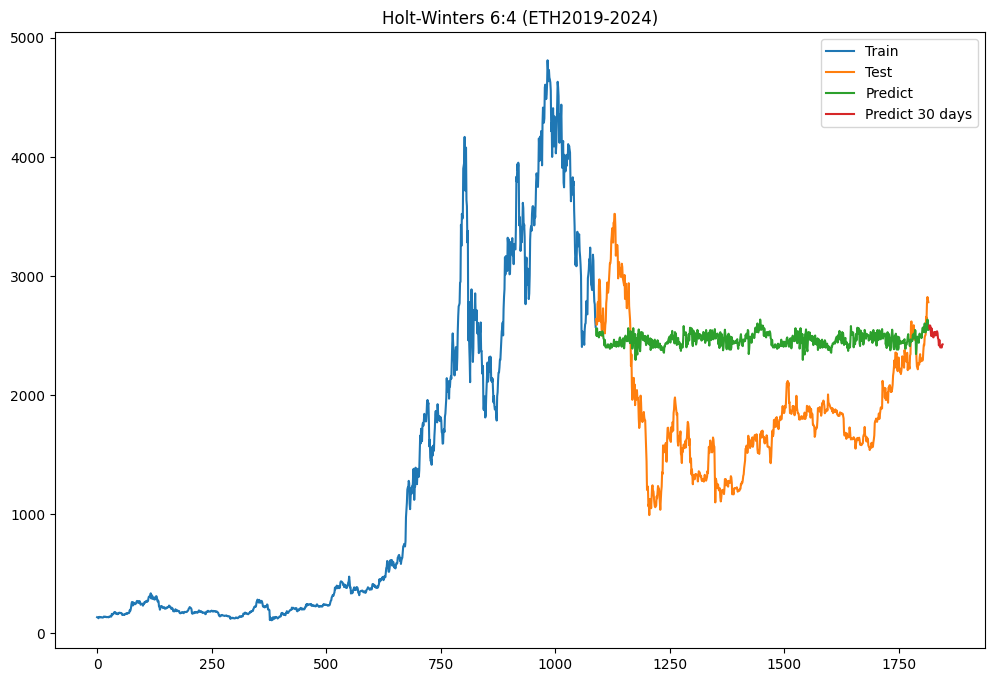

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_30_days.index, forecast_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
forecast_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(forecast_60_days)

1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
1820    2498.647483
1821    2561.160751
1822    2496.716931
1823    2501.279714
1824    2509.466334
1825    2485.422356
1826    2528.947604
1827    2508.581613
1828    2528.259604
1829    2508.758479
1830    2501.957457
1831    2531.854850
1832    2532.869942
1833    2536.418337
1834    2520.846751
1835    2477.461612
1836    2469.088212
1837    2418.027290
1838    2464.871790
1839    2420.960674
1840    2400.960364
1841    2403.935533
1842    2409.754996
1843    2400.339048
1844    2425.765923
1845    2426.969925
1846    2424.402232
1847    2401.884110
1848    2410.626967
1849    2389.476882
1850    2398.887359
1851    2433.112496
1852    2417.961887
1853    2399.900614
1854    2424.351058
1855    2414.203096
1856    2417.130196
1857    2433.286226
1858    2466.157016
1859    2412.652410
1860    2436.908138
1861    2441.217937
1862    2448.146038
1863    2406.816987
1864    2449.894051
1865    2439.553651


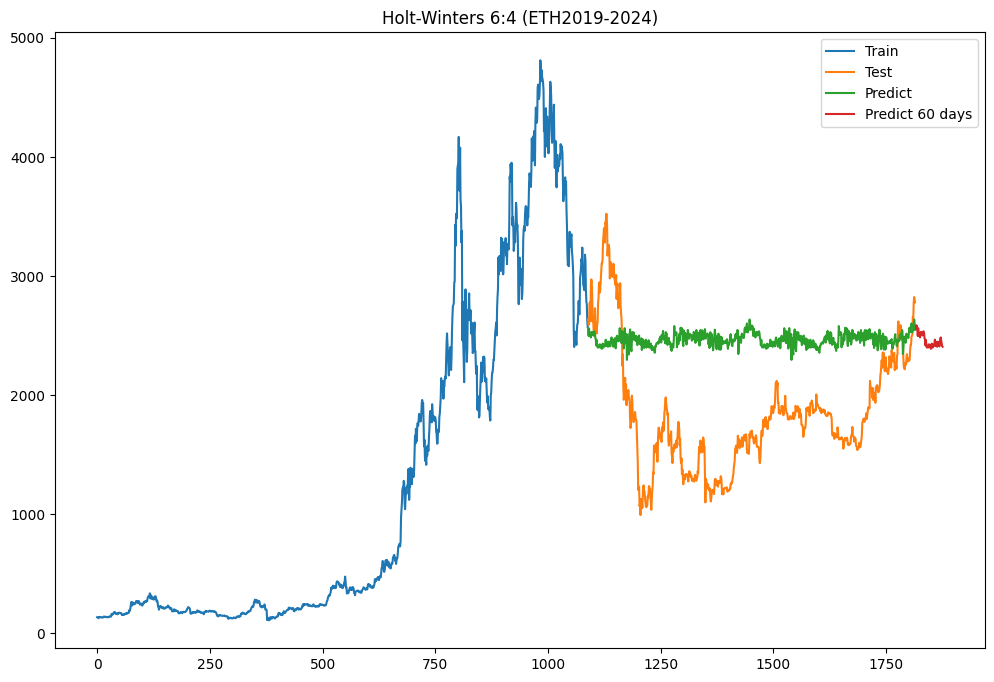

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_60_days.index, forecast_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
forecast_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(forecast_90_days)

1816    2584.301643
1817    2555.020823
1818    2584.073036
1819    2556.495626
1820    2498.647483
           ...     
1901    2443.317582
1902    2467.622496
1903    2443.261587
1904    2514.468204
1905    2296.696522
Length: 90, dtype: float64


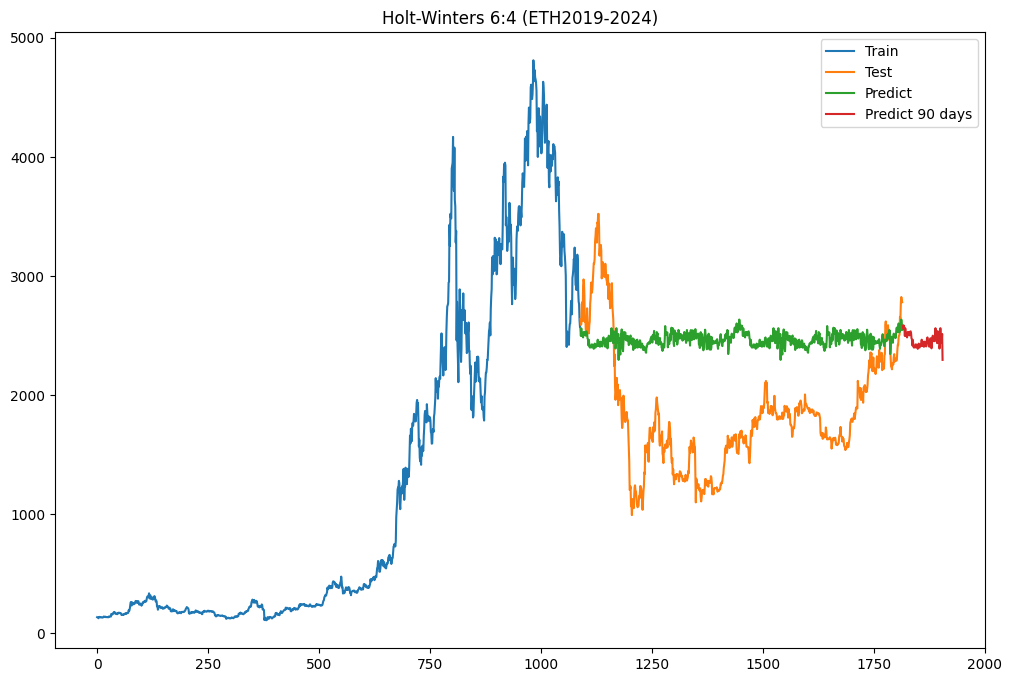

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_90_days.index, forecast_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()